In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import re

## Criar lista de arquivos e dicionário

In [3]:
arquivos = os.listdir("./dados_2002_21/")
estados = {}
print(arquivos)

['Tabela1.xls', 'Tabela10.xls', 'Tabela11.xls', 'Tabela12.xls', 'Tabela13.xls', 'Tabela14.xls', 'Tabela15.xls', 'Tabela16.xls', 'Tabela17.xls', 'Tabela18.xls', 'Tabela19.xls', 'Tabela2.xls', 'Tabela20.xls', 'Tabela21.xls', 'Tabela22.xls', 'Tabela23.xls', 'Tabela24.xls', 'Tabela25.xls', 'Tabela26.xls', 'Tabela27.xls', 'Tabela28.xls', 'Tabela29.xls', 'Tabela3.xls', 'Tabela30.xls', 'Tabela31.xls', 'Tabela32.xls', 'Tabela33.xls', 'Tabela4.xls', 'Tabela5.xls', 'Tabela6.xls', 'Tabela7.xls', 'Tabela8.xls', 'Tabela9.xls']


In [4]:
def extair_dados(arquivo, celula):
    number = re.findall(r'\d+', arquivo)
    df = pd.read_excel("./dados_2002_21/" + arquivo, sheet_name='Tabela' + number[0] + '.' + str(celula))
    df = df.loc[53:len(df)-2]
    categoria = df.iloc[2,0]
    local = df.iloc[1,0]
    dados_anuais = pd.DataFrame()
    dados_anuais[['Ano','Valor_ano_anterior','Valor_preço_anterior','Valor_corrente']] = df.iloc[4:,[0,1,3,5]].fillna(0)
    dados_anuais[['Categoria','Local']] = categoria,local
    #dados_anuais = dados_anuais.fillna(0)
    dados_anuais['Taxa de Crescimento'] = (dados_anuais['Valor_preço_anterior']/dados_anuais['Valor_ano_anterior'])-1
    
    #criar funções para tratar colunas novas
    return dados_anuais, categoria



In [5]:
def extrair_local(arquivo, celula):
    number = re.findall(r'\d+', arquivo)
    df = pd.read_excel("./dados_2002_21/" + arquivo, sheet_name='Tabela' + number[0] + '.' + str(celula))
    df = df.loc[53:len(df)-2]
    #categoria = df.iloc[2,0]
    local = df.iloc[1,0]
    return local

In [ ]:
#Monta o dicionario a ser usado
for i in arquivos:
    celula = 1
    local = extrair_local(i, celula)
    estados[local] = dict()
    #falta loopar pelas celulas
    for celula in range(1,17):
        dados_anuais, categoria = extair_dados(i, celula)
        estados[local][categoria] = dados_anuais

In [7]:
locais = list(estados.keys())

In [8]:
locais

['Região Norte',
 'Maranhão',
 'Piauí',
 'Ceará',
 'Rio Grande do Norte',
 'Paraíba',
 'Pernambuco',
 'Alagoas',
 'Sergipe',
 'Bahia',
 'Região Sudeste',
 'Rondônia',
 'Minas Gerais',
 'Espírito Santo',
 'Rio de Janeiro',
 'São Paulo',
 'Região Sul',
 'Paraná',
 'Santa catarina',
 'Rio Grande do Sul',
 'Região Centro-Oeste',
 'Mato Grosso do Sul',
 'Acre',
 'Mato Grosso',
 'Goiás',
 'Distrito Federal',
 'Brasil',
 'Amazonas',
 'Roraima',
 'Pará',
 'Amapá',
 'Tocantins',
 'Região Nordeste']

In [9]:
for i in estados['Rio de Janeiro'].keys():
    print(i)

Total das Atividades
Agropecuária
Indústrias extrativas
Indústrias de Transformação
Eletricidade e gás, água, esgoto, atividades de gestão de resíduos e descontaminação
Construção
Comércio e reparação de veículos automotores e motocicletas
Transporte, armazenagem e correio
Alojamento e alimentação
Informação e comunicação
Atividades financeiras, de seguros e serviços relacionados
Atividades Imobiliárias
Atividades profissionais, científicas e técnicas, administrativas e serviços complementares
Administração, defesa, educação e saúde públicas e seguridade social
Educação e saúde privadas
Outras atividades de serviços


In [11]:

#cria os dados para indústria agregando as 4 categorias
for i in locais:
  estados[i]['Indústria'] = pd.DataFrame()
  estados[i]['Indústria']['Valor_ano_anterior'] = estados[i]['Indústrias extrativas']['Valor_ano_anterior']+estados[i]['Indústrias de Transformação']['Valor_ano_anterior']+estados[i]['Eletricidade e gás, água, esgoto, atividades de gestão de resíduos e descontaminação']['Valor_ano_anterior']+estados[i]['Construção']['Valor_ano_anterior']
  estados[i]['Indústria']['Valor_preço_anterior'] = estados[i]['Indústrias extrativas']['Valor_preço_anterior']+estados[i]['Indústrias de Transformação']['Valor_preço_anterior']+estados[i]['Eletricidade e gás, água, esgoto, atividades de gestão de resíduos e descontaminação']['Valor_preço_anterior']+estados[i]['Construção']['Valor_preço_anterior']
  estados[i]['Indústria']['Valor_corrente'] = estados[i]['Indústrias extrativas']['Valor_corrente']+estados[i]['Indústrias de Transformação']['Valor_corrente']+estados[i]['Eletricidade e gás, água, esgoto, atividades de gestão de resíduos e descontaminação']['Valor_corrente']+estados[i]['Construção']['Valor_corrente']
  estados[i]['Indústria']['Taxa de Crescimento'] = estados[i]['Indústria']['Valor_preço_anterior']/estados[i]['Indústria']['Valor_ano_anterior']-1
  estados[i]['Indústria']['Ano'] = range(2002,2022)
  

In [12]:
estados['Paraná']['Indústria']

,Valor_ano_anterior,Valor_preço_anterior,Valor_corrente,Taxa de Crescimento,Ano
57,0.000000,0.000000,23308.010445,NaN,2002
58,23308.010445,23662.602945,28301.257345,0.015213,2003
59,28301.257345,30763.178666,33450.052400,0.086990,2004
60,33450.052400,33313.794862,33836.920386,-0.004073,2005
61,33836.920386,33628.652637,35491.045720,-0.006155,2006
62,35491.045720,38002.559070,41390.051256,0.070765,2007
63,41390.051256,43134.547726,44581.807414,0.042148,2008
64,44581.807414,43326.117091,48466.186679,-0.028166,2009
65,48466.186679,53867.028301,54221.391000,0.111435,2010
66,54221.391000,58834.187296,62004.882442,0.085073,2011


## Criação de CSVs com dados de conjuntos de territórios

In [58]:
locais_importantes = ['Rio de Janeiro','Região Sudeste','São Paulo', 'Brasil']
atividades_importantes = ['Total das Atividades','Indústrias extrativas',
                          'Indústrias de Transformação',
                          'Eletricidade e gás, água, esgoto, atividades de gestão de resíduos e descontaminação',
                          'Construção']


for local in locais_importantes:
    df_completo = pd.DataFrame(columns=estados['Rio de Janeiro']['Indústrias de Transformação'].keys())
    df_completo = df_completo.set_index('Ano')
    df_completo.drop(labels=['Categoria','Local'],axis=1,inplace=True)
    for atividade in atividades_importantes:
        novo_df = pd.DataFrame(estados[local][atividade])
        novo_df = novo_df.set_index('Ano')
        novo_df.drop(labels=['Categoria','Local'],axis=1,inplace=True)
        novo_df =  novo_df.add_suffix("_"+atividade)
        df_completo = df_completo.join(novo_df, on='Ano', how='right')
    df_completo = df_completo.iloc[:,4:]
    df_completo.to_csv(local[0:5]+'.csv')

## Leitura de CSVs armazenados

In [ ]:
prefixo = 1
recorte = 'Jornada_PPGSA_2024'
for local in locais_importantes:
    for atividade in atividades_importantes:
        estados[local][atividade].to_csv(recorte+'/'+str(prefixo)+'_'+str(local)+'_'+str(atividade)+'.csv')
    prefixo = prefixo + 1

In [ ]:
tabelas_jornada = os.listdir("./"+recorte)
print(tabelas_jornada)

['1_Rio de Janeiro_Construção.csv', '1_Rio de Janeiro_Eletricidade e gás, água, esgoto, atividades de gestão de resíduos e descontaminação.csv', '1_Rio de Janeiro_Indústrias de Transformação.csv', '1_Rio de Janeiro_Indústrias extrativas.csv', '1_Rio de Janeiro_Total das Atividades.csv', '2_Região Sudeste_Construção.csv', '2_Região Sudeste_Eletricidade e gás, água, esgoto, atividades de gestão de resíduos e descontaminação.csv', '2_Região Sudeste_Indústrias de Transformação.csv', '2_Região Sudeste_Indústrias extrativas.csv', '2_Região Sudeste_Total das Atividades.csv', '3_São Paulo_Construção.csv', '3_São Paulo_Eletricidade e gás, água, esgoto, atividades de gestão de resíduos e descontaminação.csv', '3_São Paulo_Indústrias de Transformação.csv', '3_São Paulo_Indústrias extrativas.csv', '3_São Paulo_Total das Atividades.csv', '4_Brasil_Construção.csv', '4_Brasil_Eletricidade e gás, água, esgoto, atividades de gestão de resíduos e descontaminação.csv', '4_Brasil_Indústrias de Transformaç

In [ ]:
tabela_final = pd.DataFrame(columns=estados['Rio de Janeiro']['Indústrias de Transformação'].keys())
for tabela in tabelas_jornada:
    df = pd.read_csv("./"+recorte+'/'+tabela, index_col=0)
    tabela_final = tabela_final.join(df,on='Ano',how='outer',rsuffix=str(tabela))

tabela_final.head()
#tabela_final.head()

,Ano,Valor_ano_anterior,Valor_preço_anterior,Valor_corrente,Categoria,Local,Taxa de Crescimento,Ano1_Rio de Janeiro_Construção.csv,Valor_ano_anterior1_Rio de Janeiro_Construção.csv,Valor_preço_anterior1_Rio de Janeiro_Construção.csv,...,Categoria4_Brasil_Indústrias extrativas.csv,Local4_Brasil_Indústrias extrativas.csv,Taxa de Crescimento4_Brasil_Indústrias extrativas.csv,Ano4_Brasil_Total das Atividades.csv,Valor_ano_anterior4_Brasil_Total das Atividades.csv,Valor_preço_anterior4_Brasil_Total das Atividades.csv,Valor_corrente4_Brasil_Total das Atividades.csv,Categoria4_Brasil_Total das Atividades.csv,Local4_Brasil_Total das Atividades.csv,Taxa de Crescimento4_Brasil_Total das Atividades.csv
57,57,NaN,NaN,NaN,NaN,NaN,NaN,2002,0.000000,0.000000,...,Indústrias extrativas,Brasil,NaN,2002,0.000000e+00,0.000,1.270215e+06,Total das Atividades,Brasil,NaN
58,58,NaN,NaN,NaN,NaN,NaN,NaN,2003,11581.665827,10887.638790,...,Indústrias extrativas,Brasil,0.045828,2003,1.270215e+06,1285796.439,1.470717e+06,Total das Atividades,Brasil,0.012267
59,59,NaN,NaN,NaN,NaN,NaN,NaN,2004,9320.982137,10140.230385,...,Indústrias extrativas,Brasil,-0.004693,2004,1.470717e+06,1553911.221,1.661982e+06,Total das Atividades,Brasil,0.056567
60,60,NaN,NaN,NaN,NaN,NaN,NaN,2005,10968.564223,10397.660691,...,Indústrias extrativas,Brasil,0.068071,2005,1.661982e+06,1712074.247,1.842818e+06,Total das Atividades,Brasil,0.030140
61,61,NaN,NaN,NaN,NaN,NaN,NaN,2006,10678.584565,10356.799776,...,Indústrias extrativas,Brasil,0.065246,2006,1.842818e+06,1910748.664,2.049290e+06,Total das Atividades,Brasil,0.036862


## Geração de graficos comparativos

In [30]:
def criacao_df_grafico(atividade,serie_dados):
    #Cria DF base
    locais_excluidos=['Região Sudeste','Região Norte','Região Nordeste','Região Centro-Oeste','Região Sul']
    df = pd.DataFrame()
    df['Ano'] = range(2002,2022)
    df = df.set_index('Ano')
    for i in locais:
        if i not in locais_excluidos:
            df[i] = estados[i][atividade][['Ano',serie_dados]].set_index('Ano')

    #FORMA DF para grafico daquelas variáveis
    df = df.reset_index()
    df.index = pd.to_datetime(df['Ano'], format='%Y')
    df = df.iloc[:,1:]
    df['Média']=df.drop('Brasil', axis=1).mean(axis=1) # elimina Brasil para não distorcer média

    return df

### Taxa de Crescimento, PIB

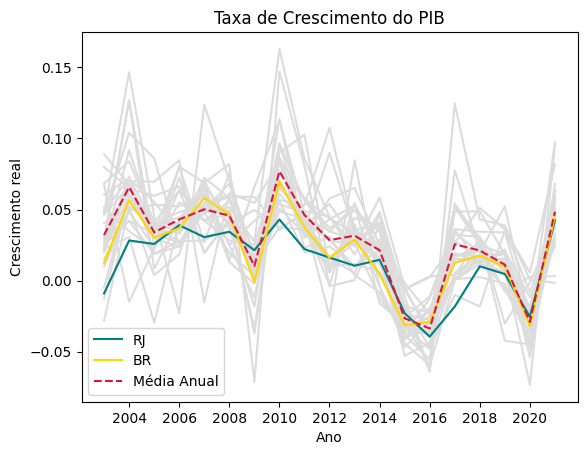

In [37]:
#PLOTAR GRAFICO COMPARATIVO
df_PIB_crescimento = criacao_df_grafico('Total das Atividades','Taxa de Crescimento')
#df_taxa_crescimento.head()

fig, ax = plt.subplots()
ax.plot(df_PIB_crescimento.drop('Média', axis=1), color='gainsboro')
ax.plot(df_PIB_crescimento['Rio de Janeiro'], color='teal', label='RJ')
ax.plot(df_PIB_crescimento['Brasil'], color = 'gold', label='BR')
ax.plot(df_PIB_crescimento['Média'], color = 'crimson', label='Média Anual', linestyle='--')

plt.title('Taxa de Crescimento do PIB')
plt.ylabel('Crescimento real')
plt.xlabel('Ano')
plt.legend()
plt.savefig('./figuras/PIB_crescimento.svg')
plt.show()


In [163]:
#geração de ranking de estados pela variável
ranking_PIB =  pd.DataFrame()
ranking_PIB['2002-2021'] = df_PIB_crescimento.iloc[:,:].mean()
ranking_PIB['2002-2009'] = df_PIB_crescimento.iloc[0:7,:].mean()
ranking_PIB['2010-2015'] = df_PIB_crescimento.iloc[7:13,:].mean()
ranking_PIB['2016-2021'] = df_PIB_crescimento.iloc[13:,:].mean()
ranking_PIB.sort_index().head()

ranking_PIB.to_csv('ranking_pib.csv')

### Taxa de Crescimento, Indústria geral

In [ ]:
#TAXA DE CRESCIMENTO INDUSTRIA DE TRANSFORMAÇÂO
locais_excluidos=['Região Sudeste','Região Norte','Região Nordeste','Região Centro-Oeste','Região Sul']
df_taxa_crescimento = pd.DataFrame()
df_taxa_crescimento['Ano'] = range(2002,2022)
df_taxa_crescimento = df_taxa_crescimento.set_index('Ano')
for i in locais:
    if i not in locais_excluidos:
        df_taxa_crescimento[i] = estados[i]['Indústria'][['Ano','Taxa de Crescimento']].set_index('Ano')


In [ ]:
#FORMA DF para grafico daquelas variáveis
df_taxa_crescimento = df_taxa_crescimento.reset_index()
df_taxa_crescimento.index = pd.to_datetime(df_taxa_crescimento['Ano'], format='%Y')
df_taxa_crescimento = df_taxa_crescimento.iloc[:,1:]
df_taxa_crescimento['Média']=df_taxa_crescimento.drop('Brasil', axis=1).mean(axis=1)

In [ ]:
df_taxa_crescimento.head()

,Maranhão,Piauí,Ceará,Rio Grande do Norte,Paraíba,Pernambuco,Alagoas,Sergipe,Bahia,Rondônia,...,Mato Grosso,Goiás,Distrito Federal,Brasil,Amazonas,Roraima,Pará,Amapá,Tocantins,Média
Ano,,,,,,,,,,,,,,,,,,,,,
2002-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2003-01-01,0.085874,-0.008779,-0.039566,0.004989,0.085110,-0.116838,-0.059058,-0.017350,0.068015,-0.020190,...,0.043465,0.076628,-0.120060,0.001036,0.057924,-0.070990,0.094890,0.043481,0.096079,0.005224
2004-01-01,0.019413,0.269827,0.121282,0.058857,0.086788,0.126276,0.069055,0.094540,0.118288,0.307475,...,0.125827,0.110318,0.056718,0.082149,0.143862,0.068724,0.128350,0.013119,0.172423,0.118240
2005-01-01,0.037174,-0.047664,-0.017953,-0.032503,-0.066822,0.013829,0.026589,0.029178,0.031865,-0.162895,...,0.016602,0.007842,0.010703,0.019944,0.089622,0.076008,0.023212,0.181671,-0.022502,0.002529
2006-01-01,0.035441,0.061567,0.061809,-0.049901,0.141948,0.040823,0.020050,0.067835,0.019631,0.068251,...,0.039324,0.017221,-0.008175,0.020065,0.002483,0.208528,0.086129,0.125873,0.047658,0.051443


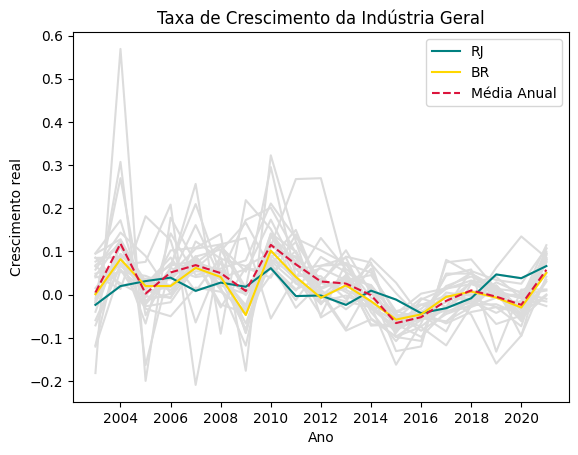

In [29]:
#PLOTAR GRAFICO COMPARATIVO
df_industria_geral = criacao_df_grafico('Indústria','Taxa de Crescimento')

fig, ax = plt.subplots()
ax.plot(df_industria_geral.drop('Média', axis=1), color='gainsboro')
ax.plot(df_industria_geral['Rio de Janeiro'], color='teal', label='RJ')
ax.plot(df_industria_geral['Brasil'], color = 'gold', label='BR')
ax.plot(df_industria_geral['Média'], color = 'crimson', label='Média Anual', linestyle='--')

plt.title('Taxa de Crescimento da Indústria Geral')
plt.ylabel('Crescimento real')
plt.xlabel('Ano')
plt.legend()
plt.show()

In [ ]:
df_taxa_crescimento.mean().sort_values()
df_taxa_crescimento.iloc[0:7,:].mean().sort_values()
#df_taxa_crescimento.iloc[7:13,:].mean().sort_values()
#df_taxa_crescimento.iloc[13:,:].mean().sort_values()

Rio Grande do Norte    0.000789
Rio de Janeiro         0.017366
Rio Grande do Sul      0.022339
Santa catarina         0.024087
Distrito Federal       0.024299
Pernambuco             0.028913
Roraima                0.029109
Alagoas                0.031187
Paraná                 0.034148
Ceará                  0.035886
Sergipe                0.036966
Brasil                 0.037709
São Paulo              0.039103
Minas Gerais           0.043733
Média                  0.049314
Goiás                  0.053782
Bahia                  0.057178
Paraíba                0.058774
Maranhão               0.061786
Amapá                  0.062693
Mato Grosso do Sul     0.062901
Amazonas               0.064663
Mato Grosso            0.070759
Pará                   0.071031
Espírito Santo         0.072967
Piauí                  0.073505
Rondônia               0.074877
Tocantins              0.086074
Acre                   0.092573
dtype: float64

### Taxa de Crescimento, Ind. de Transformação

In [ ]:
#TAXA DE CRESCIMENTO INDUSTRIA DE TRANSFORMAÇÂO
locais_excluidos=['Região Sudeste','Região Norte','Região Nordeste','Região Centro-Oeste','Região Sul']
df_taxa_crescimento = pd.DataFrame()
df_taxa_crescimento['Ano'] = range(2002,2022)
df_taxa_crescimento = df_taxa_crescimento.set_index('Ano')
for i in locais:
    if i not in locais_excluidos:
        df_taxa_crescimento[i] = estados[i]['Indústrias de Transformação'][['Ano','Taxa de Crescimento']].set_index('Ano')


In [ ]:
#FORMA DF para grafico daquelas variáveis
df_taxa_crescimento = df_taxa_crescimento.reset_index()
df_taxa_crescimento.index = pd.to_datetime(df_taxa_crescimento['Ano'], format='%Y')
df_taxa_crescimento = df_taxa_crescimento.iloc[:,1:]
df_taxa_crescimento['Média']=df_taxa_crescimento.drop('Brasil', axis=1).mean(axis=1)

In [ ]:
df_taxa_crescimento.head()

,Maranhão,Piauí,Ceará,Rio Grande do Norte,Paraíba,Pernambuco,Alagoas,Sergipe,Bahia,Rondônia,...,Mato Grosso,Goiás,Distrito Federal,Brasil,Amazonas,Roraima,Pará,Amapá,Tocantins,Média
Ano,,,,,,,,,,,,,,,,,,,,,
2002-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2003-01-01,0.188707,0.171287,0.002222,-0.001319,0.215499,0.013893,-0.005510,-0.025160,0.192437,0.091695,...,0.092565,0.140578,-0.088623,0.026594,0.073163,0.016150,0.068348,0.046547,0.284483,0.065617
2004-01-01,0.088333,0.144195,0.126482,0.003918,0.073105,0.050944,-0.016934,0.145280,0.132526,0.073335,...,0.133436,0.084678,-0.017607,0.090828,0.154470,0.070892,0.061902,0.195690,0.160292,0.091351
2005-01-01,0.029430,0.065490,-0.023660,0.044922,0.057379,0.034372,0.021495,0.081712,0.063865,0.027097,...,0.081650,0.036565,0.083383,0.022427,0.122494,-0.013451,-0.006359,0.383469,0.030798,0.047534
2006-01-01,0.017491,0.029283,0.045866,-0.040650,0.097509,0.045608,0.070420,0.040327,0.004955,0.045014,...,0.059707,0.012362,0.197590,0.012336,0.006517,-0.022881,0.116526,-0.004757,0.042682,0.033697


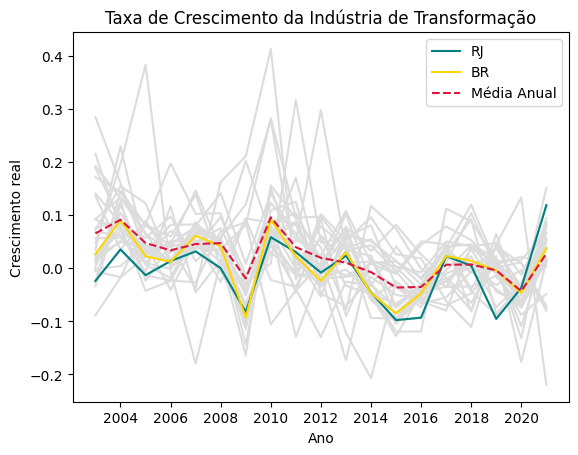

In [ ]:
#PLOTAR GRAFICO COMPARATIVO

fig, ax = plt.subplots()
ax.plot(df_taxa_crescimento.drop('Média', axis=1), color='gainsboro')
ax.plot(df_taxa_crescimento['Rio de Janeiro'], color='teal', label='RJ')
ax.plot(df_taxa_crescimento['Brasil'], color = 'gold', label='BR')
ax.plot(df_taxa_crescimento['Média'], color = 'crimson', label='Média Anual', linestyle='--')

plt.title('Taxa de Crescimento da Indústria de Transformação')
plt.ylabel('Crescimento real')
plt.xlabel('Ano')
plt.legend()
plt.show()

In [ ]:
df_taxa_crescimento.mean().sort_values()
df_taxa_crescimento.iloc[0:7,:].mean().sort_values()
#df_taxa_crescimento.iloc[7:13,:].mean().sort_values()
#df_taxa_crescimento.iloc[13:,:].mean().sort_values()

Rio de Janeiro         0.007339
Roraima                0.015627
Rio Grande do Norte    0.018099
Rio Grande do Sul      0.022416
Santa catarina         0.023006
Alagoas                0.033900
Pará                   0.035075
Minas Gerais           0.038359
Ceará                  0.039583
Brasil                 0.042516
Espírito Santo         0.042959
Sergipe                0.044859
Pernambuco             0.045034
Paraná                 0.045282
São Paulo              0.046696
Média                  0.055182
Distrito Federal       0.063474
Maranhão               0.064617
Goiás                  0.066455
Rondônia               0.069875
Amapá                  0.075759
Bahia                  0.077473
Amazonas               0.080013
Mato Grosso do Sul     0.082879
Mato Grosso            0.084939
Acre                   0.085174
Paraíba                0.085838
Piauí                  0.088461
Tocantins              0.107152
dtype: float64

### Taxa de Crescimento, Extrativa

In [ ]:
#TAXA DE CRESCIMENTO INDUSTRIA DE TRANSFORMAÇÂO
locais_excluidos=['Região Sudeste','Região Norte','Região Nordeste','Região Centro-Oeste','Região Sul']
df_taxa_crescimento = pd.DataFrame()
df_taxa_crescimento['Ano'] = range(2002,2022)
df_taxa_crescimento = df_taxa_crescimento.set_index('Ano')
for i in locais:
    if i not in locais_excluidos:
        df_taxa_crescimento[i] = estados[i]['Indústrias de Transformação'][['Ano','Taxa de Crescimento']].set_index('Ano')


In [ ]:
#FORMA DF para grafico daquelas variáveis
df_taxa_crescimento = df_taxa_crescimento.reset_index()
df_taxa_crescimento.index = pd.to_datetime(df_taxa_crescimento['Ano'], format='%Y')
df_taxa_crescimento = df_taxa_crescimento.iloc[:,1:]
df_taxa_crescimento['Média']=df_taxa_crescimento.drop('Brasil', axis=1).mean(axis=1)

In [ ]:
df_taxa_crescimento.head()

,Maranhão,Piauí,Ceará,Rio Grande do Norte,Paraíba,Pernambuco,Alagoas,Sergipe,Bahia,Rondônia,...,Mato Grosso,Goiás,Distrito Federal,Brasil,Amazonas,Roraima,Pará,Amapá,Tocantins,Média
Ano,,,,,,,,,,,,,,,,,,,,,
2002-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2003-01-01,0.188707,0.171287,0.002222,-0.001319,0.215499,0.013893,-0.005510,-0.025160,0.192437,0.091695,...,0.092565,0.140578,-0.088623,0.026594,0.073163,0.016150,0.068348,0.046547,0.284483,0.065617
2004-01-01,0.088333,0.144195,0.126482,0.003918,0.073105,0.050944,-0.016934,0.145280,0.132526,0.073335,...,0.133436,0.084678,-0.017607,0.090828,0.154470,0.070892,0.061902,0.195690,0.160292,0.091351
2005-01-01,0.029430,0.065490,-0.023660,0.044922,0.057379,0.034372,0.021495,0.081712,0.063865,0.027097,...,0.081650,0.036565,0.083383,0.022427,0.122494,-0.013451,-0.006359,0.383469,0.030798,0.047534
2006-01-01,0.017491,0.029283,0.045866,-0.040650,0.097509,0.045608,0.070420,0.040327,0.004955,0.045014,...,0.059707,0.012362,0.197590,0.012336,0.006517,-0.022881,0.116526,-0.004757,0.042682,0.033697


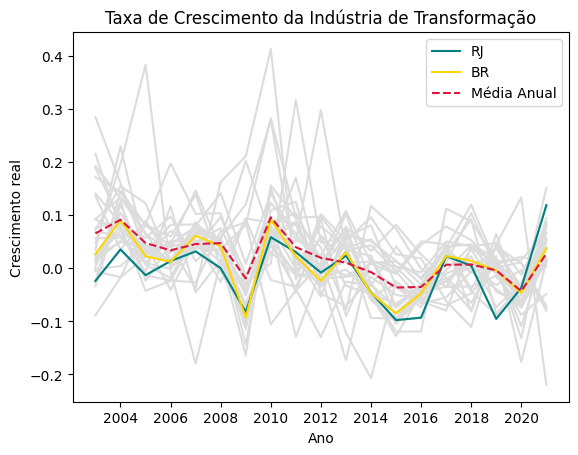

In [ ]:
#PLOTAR GRAFICO COMPARATIVO

fig, ax = plt.subplots()
ax.plot(df_taxa_crescimento.drop('Média', axis=1), color='gainsboro')
ax.plot(df_taxa_crescimento['Rio de Janeiro'], color='teal', label='RJ')
ax.plot(df_taxa_crescimento['Brasil'], color = 'gold', label='BR')
ax.plot(df_taxa_crescimento['Média'], color = 'crimson', label='Média Anual', linestyle='--')

plt.title('Taxa de Crescimento da Indústria de Transformação')
plt.ylabel('Crescimento real')
plt.xlabel('Ano')
plt.legend()
plt.show()

In [ ]:
df_taxa_crescimento.mean().sort_values()
df_taxa_crescimento.iloc[0:7,:].mean().sort_values()
#df_taxa_crescimento.iloc[7:13,:].mean().sort_values()
#df_taxa_crescimento.iloc[13:,:].mean().sort_values()

Rio de Janeiro         0.007339
Roraima                0.015627
Rio Grande do Norte    0.018099
Rio Grande do Sul      0.022416
Santa catarina         0.023006
Alagoas                0.033900
Pará                   0.035075
Minas Gerais           0.038359
Ceará                  0.039583
Brasil                 0.042516
Espírito Santo         0.042959
Sergipe                0.044859
Pernambuco             0.045034
Paraná                 0.045282
São Paulo              0.046696
Média                  0.055182
Distrito Federal       0.063474
Maranhão               0.064617
Goiás                  0.066455
Rondônia               0.069875
Amapá                  0.075759
Bahia                  0.077473
Amazonas               0.080013
Mato Grosso do Sul     0.082879
Mato Grosso            0.084939
Acre                   0.085174
Paraíba                0.085838
Piauí                  0.088461
Tocantins              0.107152
dtype: float64

### Taxa de Crescimento, Construção

In [227]:
#TAXA DE CRESCIMENTO INDUSTRIA DE TRANSFORMAÇÂO
locais_excluidos=['Região Sudeste','Região Norte','Região Nordeste','Região Centro-Oeste','Região Sul']
df_taxa_crescimento = pd.DataFrame()
df_taxa_crescimento['Ano'] = range(2002,2022)
df_taxa_crescimento = df_taxa_crescimento.set_index('Ano')
for i in locais:
    if i not in locais_excluidos:
        df_taxa_crescimento[i] = estados[i]['Construção'][['Ano','Taxa de Crescimento']].set_index('Ano')


In [228]:
#FORMA DF para grafico daquelas variáveis
df_taxa_crescimento = df_taxa_crescimento.reset_index()
df_taxa_crescimento.index = pd.to_datetime(df_taxa_crescimento['Ano'], format='%Y')
df_taxa_crescimento = df_taxa_crescimento.iloc[:,1:]
df_taxa_crescimento['Média']=df_taxa_crescimento.drop('Brasil', axis=1).mean(axis=1)

In [229]:
df_taxa_crescimento.head()

,Maranhão,Piauí,Ceará,Rio Grande do Norte,Paraíba,Pernambuco,Alagoas,Sergipe,Bahia,Rondônia,...,Mato Grosso,Goiás,Distrito Federal,Brasil,Amazonas,Roraima,Pará,Amapá,Tocantins,Média
Ano,,,,,,,,,,,,,,,,,,,,,
2002-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2003-01-01,0.010768,-0.145637,-0.148972,-0.026383,-0.096180,-0.280486,-0.194001,-0.133282,-0.083648,-0.129992,...,-0.028527,-0.057229,-0.165194,-0.089432,-0.003883,-0.120512,0.067033,0.052327,-0.165965,-0.082999
2004-01-01,-0.078906,0.442384,0.099427,0.289870,0.179037,0.274314,0.348977,0.237427,0.152254,0.690562,...,0.106787,0.174887,0.139860,0.107449,0.104788,0.072329,0.326761,-0.091848,0.294062,0.189888
2005-01-01,0.044130,-0.176802,-0.007449,-0.066359,-0.322557,-0.004405,-0.002979,-0.184481,-0.004223,-0.295278,...,-0.129315,-0.048246,-0.039583,-0.020996,-0.007083,0.156368,0.057597,0.061070,-0.068624,-0.061174
2006-01-01,0.076710,0.097655,0.132219,-0.042352,0.429124,0.037470,-0.126073,0.191124,0.074387,0.098707,...,-0.015390,0.073167,-0.101925,0.002632,0.012766,0.421074,-0.085665,0.252730,0.043856,0.078185


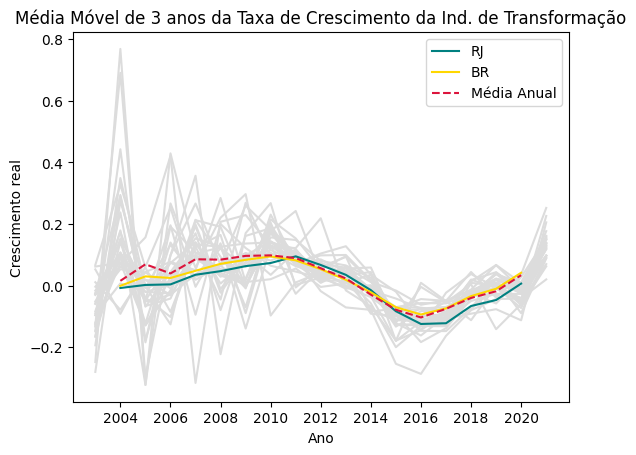

In [233]:
#PLOTAR GRAFICO COMPARATIVO

fig, ax = plt.subplots()
ax.plot(df_taxa_crescimento.drop('Média', axis=1), color='gainsboro')
ax.plot(df_taxa_crescimento['Rio de Janeiro'].rolling(3,center=True).mean(), color='teal', label='RJ')
ax.plot(df_taxa_crescimento['Brasil'].rolling(3,center=True).mean(), color = 'gold', label='BR')
ax.plot(df_taxa_crescimento['Média'].rolling(3,center=True).mean(), color = 'crimson', label='Média Anual', linestyle='--')

plt.title('Média Móvel de 3 anos da Taxa de Crescimento da Ind. de Transformação')
plt.ylabel('Crescimento real')
plt.xlabel('Ano')
plt.legend()
plt.show()

In [ ]:
df_taxa_crescimento.mean().sort_values()
df_taxa_crescimento.iloc[0:7,:].mean().sort_values()
#df_taxa_crescimento.iloc[7:13,:].mean().sort_values()
#df_taxa_crescimento.iloc[13:,:].mean().sort_values()

Rio de Janeiro         0.007339
Roraima                0.015627
Rio Grande do Norte    0.018099
Rio Grande do Sul      0.022416
Santa catarina         0.023006
Alagoas                0.033900
Pará                   0.035075
Minas Gerais           0.038359
Ceará                  0.039583
Brasil                 0.042516
Espírito Santo         0.042959
Sergipe                0.044859
Pernambuco             0.045034
Paraná                 0.045282
São Paulo              0.046696
Média                  0.055182
Distrito Federal       0.063474
Maranhão               0.064617
Goiás                  0.066455
Rondônia               0.069875
Amapá                  0.075759
Bahia                  0.077473
Amazonas               0.080013
Mato Grosso do Sul     0.082879
Mato Grosso            0.084939
Acre                   0.085174
Paraíba                0.085838
Piauí                  0.088461
Tocantins              0.107152
dtype: float64

## Dados apenas do Rio

In [210]:
df_rio = pd.read_csv('RJ.csv',index_col='Ano')
df_rio.head()

,Valor_ano_anterior_Total das Atividades,Valor_preço_anterior_Total das Atividades,Valor_corrente_Total das Atividades,Taxa de Crescimento_Total das Atividades,Valor_ano_anterior_Indústrias extrativas,Valor_preço_anterior_Indústrias extrativas,Valor_corrente_Indústrias extrativas,Taxa de Crescimento_Indústrias extrativas,Valor_ano_anterior_Indústrias de Transformação,Valor_preço_anterior_Indústrias de Transformação,Valor_corrente_Indústrias de Transformação,Taxa de Crescimento_Indústrias de Transformação,"Valor_ano_anterior_Eletricidade e gás, água, esgoto, atividades de gestão de resíduos e descontaminação","Valor_preço_anterior_Eletricidade e gás, água, esgoto, atividades de gestão de resíduos e descontaminação","Valor_corrente_Eletricidade e gás, água, esgoto, atividades de gestão de resíduos e descontaminação","Taxa de Crescimento_Eletricidade e gás, água, esgoto, atividades de gestão de resíduos e descontaminação",Valor_ano_anterior_Construção,Valor_preço_anterior_Construção,Valor_corrente_Construção,Taxa de Crescimento_Construção
Ano,,,,,,,,,,,,,,,,,,,,
2002,0.000000,0.000000,157947.564591,NaN,0.000000,0.000000,15446.549487,NaN,0.000000,0.000000,11165.029985,NaN,0.000000,0.000000,5029.546673,NaN,0.000000,0.000000,11581.665827,NaN
2003,157947.564591,156509.845745,175430.466376,-0.009103,15446.549487,15553.450207,19791.039773,0.006921,11165.029985,10900.109800,15385.394409,-0.023728,5029.546673,4864.452154,5399.749021,-0.032825,11581.665827,10887.638790,9320.982137,-0.059925
2004,175430.466376,180371.079263,199826.624078,0.028163,19791.039773,19013.085260,23174.479357,-0.039308,15385.394409,15929.579707,20560.307963,0.035370,5399.749021,5809.421667,5983.023061,0.075869,9320.982137,10140.230385,10968.564223,0.087893
2005,199826.624078,204971.367797,227038.904140,0.025746,23174.479357,25844.232576,36498.827549,0.115202,20560.307963,20292.313608,20157.784292,-0.013035,5983.023061,6062.869055,7168.435047,0.013345,10968.564223,10397.660691,10678.584565,-0.052049
2006,227038.904140,235877.366724,253626.466332,0.038929,36498.827549,39049.102771,48846.717961,0.069873,20157.784292,20431.119575,21255.022429,0.013560,7168.435047,7604.557106,7755.503247,0.060839,10678.584565,10356.799776,10837.632335,-0.030134


In [212]:
df_rio = pd.read_csv('RJ.csv')
df_rio = df_rio.reset_index()
df_rio.index = pd.to_datetime(df_rio['Ano'], format='%Y')
df_rio.drop('Ano',axis=1, inplace=True)
df_rio.head()

,index,Valor_ano_anterior_Total das Atividades,Valor_preço_anterior_Total das Atividades,Valor_corrente_Total das Atividades,Taxa de Crescimento_Total das Atividades,Valor_ano_anterior_Indústrias extrativas,Valor_preço_anterior_Indústrias extrativas,Valor_corrente_Indústrias extrativas,Taxa de Crescimento_Indústrias extrativas,Valor_ano_anterior_Indústrias de Transformação,...,Valor_corrente_Indústrias de Transformação,Taxa de Crescimento_Indústrias de Transformação,"Valor_ano_anterior_Eletricidade e gás, água, esgoto, atividades de gestão de resíduos e descontaminação","Valor_preço_anterior_Eletricidade e gás, água, esgoto, atividades de gestão de resíduos e descontaminação","Valor_corrente_Eletricidade e gás, água, esgoto, atividades de gestão de resíduos e descontaminação","Taxa de Crescimento_Eletricidade e gás, água, esgoto, atividades de gestão de resíduos e descontaminação",Valor_ano_anterior_Construção,Valor_preço_anterior_Construção,Valor_corrente_Construção,Taxa de Crescimento_Construção
Ano,,,,,,,,,,,,,,,,,,,,,
2002-01-01,0,0.000000,0.000000,157947.564591,NaN,0.000000,0.000000,15446.549487,NaN,0.000000,...,11165.029985,NaN,0.000000,0.000000,5029.546673,NaN,0.000000,0.000000,11581.665827,NaN
2003-01-01,1,157947.564591,156509.845745,175430.466376,-0.009103,15446.549487,15553.450207,19791.039773,0.006921,11165.029985,...,15385.394409,-0.023728,5029.546673,4864.452154,5399.749021,-0.032825,11581.665827,10887.638790,9320.982137,-0.059925
2004-01-01,2,175430.466376,180371.079263,199826.624078,0.028163,19791.039773,19013.085260,23174.479357,-0.039308,15385.394409,...,20560.307963,0.035370,5399.749021,5809.421667,5983.023061,0.075869,9320.982137,10140.230385,10968.564223,0.087893
2005-01-01,3,199826.624078,204971.367797,227038.904140,0.025746,23174.479357,25844.232576,36498.827549,0.115202,20560.307963,...,20157.784292,-0.013035,5983.023061,6062.869055,7168.435047,0.013345,10968.564223,10397.660691,10678.584565,-0.052049
2006-01-01,4,227038.904140,235877.366724,253626.466332,0.038929,36498.827549,39049.102771,48846.717961,0.069873,20157.784292,...,21255.022429,0.013560,7168.435047,7604.557106,7755.503247,0.060839,10678.584565,10356.799776,10837.632335,-0.030134


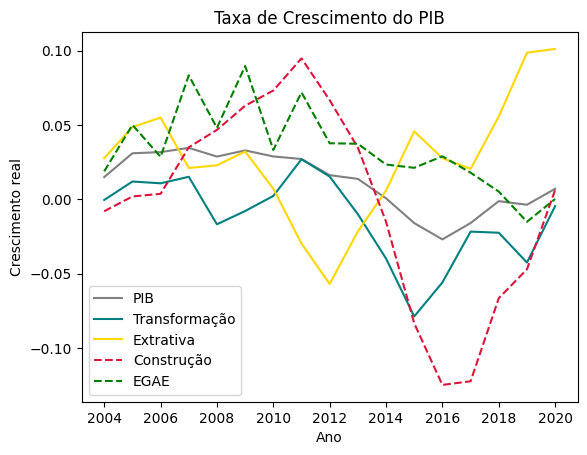

In [236]:
#FORMA DF para grafico daquelas variáveis

fig, ax = plt.subplots()
ax.plot(df_rio['Taxa de Crescimento_Total das Atividades'].rolling(3,center=True).mean(), color='grey', label='PIB')
ax.plot(df_rio['Taxa de Crescimento_Indústrias de Transformação'].rolling(3,center=True).mean(), color='teal', label='Transformação')
ax.plot(df_rio['Taxa de Crescimento_Indústrias extrativas'].rolling(3,center=True).mean(), color = 'gold', label='Extrativa')
ax.plot(df_rio['Taxa de Crescimento_Construção'].rolling(3,center=True).mean(), color = 'crimson', label='Construção', linestyle='--')
ax.plot(df_rio['Taxa de Crescimento_Eletricidade e gás, água, esgoto, atividades de gestão de resíduos e descontaminação'].rolling(3,center=True).mean(), color = 'green', label='EGAE', linestyle='--')

plt.title('Taxa de Crescimento do PIB')
plt.ylabel('Crescimento real')
plt.xlabel('Ano')
plt.legend()
plt.show()

### PARTICIPAÇÃO DOS SETORES DA INDÚSTRIA NO PIB

In [ ]:
#TRATAR DF para participação dos setores

In [ ]:
#FORMA DF para grafico daquelas variáveis

fig, ax = plt.subplots()
ax.plot(df_rio['Taxa de Crescimento_Total das Atividades'].rolling(3,center=True).mean(), color='grey', label='PIB')
ax.plot(df_rio['Taxa de Crescimento_Indústrias de Transformação'].rolling(3,center=True).mean(), color='teal', label='Transformação')
ax.plot(df_rio['Taxa de Crescimento_Indústrias extrativas'].rolling(3,center=True).mean(), color = 'gold', label='Extrativa')
ax.plot(df_rio['Taxa de Crescimento_Construção'].rolling(3,center=True).mean(), color = 'crimson', label='Construção', linestyle='--')
ax.plot(df_rio['Taxa de Crescimento_Eletricidade e gás, água, esgoto, atividades de gestão de resíduos e descontaminação'].rolling(3,center=True).mean(), color = 'green', label='EGAE', linestyle='--')

plt.title('Taxa de Crescimento do PIB')
plt.ylabel('Crescimento real')
plt.xlabel('Ano')
plt.legend()
plt.show()